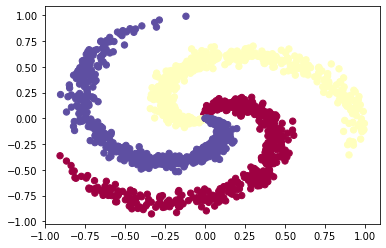

In [2]:
import numpy as np
import matplotlib.pyplot as plt
N = 500 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()




In [16]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.rand(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, n_inputs):
        self.output = np.dot(n_inputs, self.weights) + self.biases

class Activation_Relu:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

dense1 = Layer_Dense(2, 3)
actviation1 = Activation_Relu()
dense2 = Layer_Dense(3, 3)
actviation2 = Activation_Softmax()
dense1.forward(X)
actviation1.forward(dense1.output)
dense2.forward(actviation1.output)
actviation2.forward(dense2.output)
actviation2.output

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333331, 0.33333334, 0.33333335],
       [0.3333333 , 0.33333334, 0.33333336],
       ...,
       [0.33332588, 0.33333563, 0.33333849],
       [0.33332446, 0.33333608, 0.33333946],
       [0.33332858, 0.33333477, 0.33333665]])